<a href="https://colab.research.google.com/github/sreeradham/Data-Science-and-Analytics-ICT-course/blob/main/Exit_Test_Sreeradha_M.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exit test - Sreeradha M

## Exploratory Data Analysis (EDA)

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
# Load the dataset
data = pd.read_csv('/content/train.csv')
print(data)

       instance_id                             track_name  popularity  \
0      MSC_83537.0                  Estrellitas y Duendes      49.178   
1      MSC_22044.0                               Al Norte      59.827   
2      MSC_62017.0       Yeah! (feat. Lil Jon & Ludacris)      89.023   
3      MSC_76365.0                          Can’t You See      55.762   
4      MSC_71493.0  Sonata III (G Moll), BWV 1029: Adagio      45.095   
...            ...                                    ...         ...   
15676  MSC_73047.0                             I. Andante       0.000   
15677  MSC_34472.0                  Only Trust Your Heart      40.514   
15678  MSC_32827.0                        Moment's Notice      35.082   
15679  MSC_89976.0                      Such Small Scenes      59.693   
15680  MSC_43297.0                            Dogs of War      56.518   

       acousticness  danceability  duration_ms    energy  instrumentalness  \
0          0.970522      0.580508   214625.77

In [61]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

instance_id             0
track_name              0
popularity            642
acousticness            0
danceability          556
duration_ms            94
energy                 94
instrumentalness       95
key                     0
liveness                0
loudness               36
voice_gender          765
mode                   35
speechiness            26
tempo                   0
musician_category    1360
valence               677
music_genre             0
dtype: int64


In [62]:
# Summary statistics
summary_stats = data.describe()

print(summary_stats)

         popularity  acousticness  danceability   duration_ms        energy  \
count  15039.000000  15681.000000  15125.000000  1.558700e+04  15587.000000   
mean      50.822720      0.446922      0.570106  2.480008e+05      0.426977   
std       17.679789      0.416981      0.215045  1.568312e+05      0.514145   
min        0.000000      0.000002      0.063962 -1.000000e+00     -1.000000   
25%       39.017000      0.044521      0.418635  1.860163e+05      0.158277   
50%       54.109000      0.295272      0.586114  2.362127e+05      0.560389   
75%       63.449000      0.929001      0.733073  2.975593e+05      0.791881   
max      108.512000      1.094410      1.072089  3.410383e+06      1.094853   

       instrumentalness      liveness      loudness   speechiness  \
count      15586.000000  15681.000000  15645.000000  15655.000000   
mean           0.264290      0.194089    -11.621471      0.096411   
std            0.395788      0.160291      8.663364      0.105647   
min         

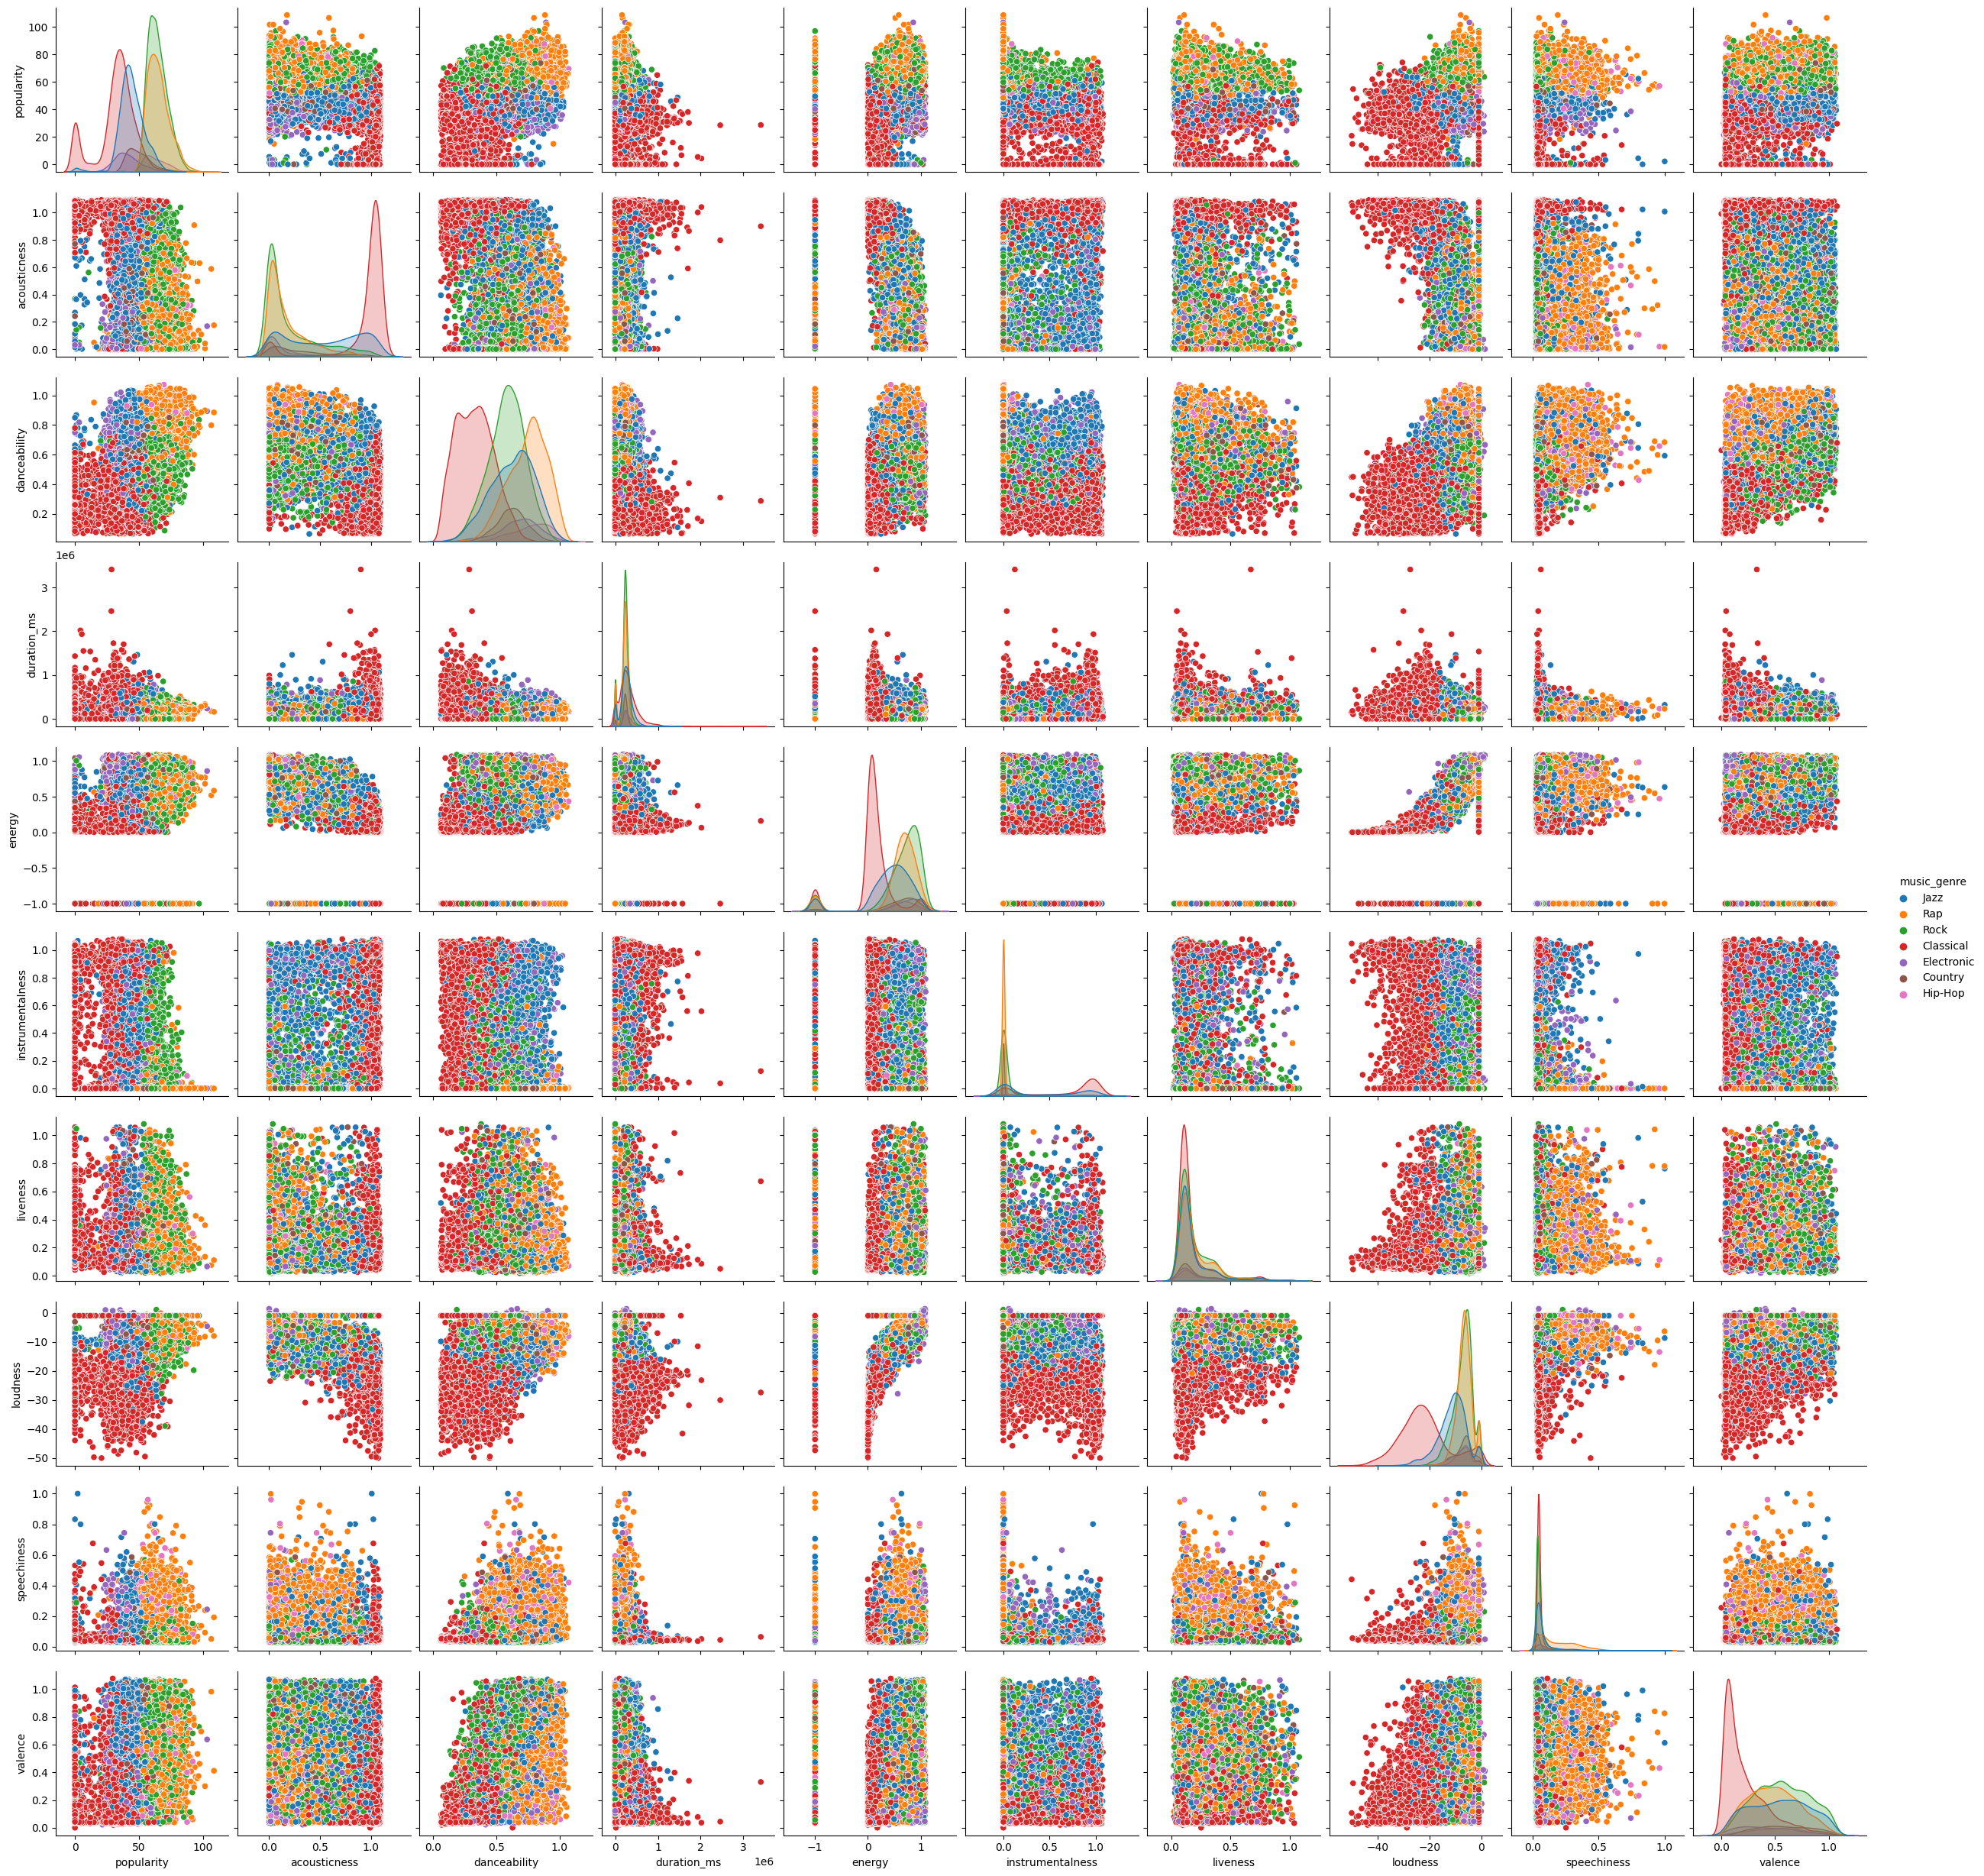

In [63]:
# Visualize data
sns.pairplot(data, hue="music_genre")
plt.show()

##Data Preprocessing

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler



In [83]:
# Handle missing values (example: impute with mean)
data.fillna(data.mean(), inplace=True)

<ipython-input-83-bbbd25939998>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


In [66]:
# Encode categorical variables
encoder = LabelEncoder()
data['voice_gender'] = encoder.fit_transform(data['voice_gender'])
data['mode'] = encoder.fit_transform(data['mode'])
data['music_genre'] = encoder.fit_transform(data['music_genre'])



In [67]:
# Split into features and target
# Assuming 'instance_id' is not needed for modeling
X = data.drop(columns=['popularity','instance_id'])
y = data['popularity']


In [68]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [69]:

# Separating categorical columns
categorical_columns = ['musician_category', 'music_genre', 'key']

In [70]:
# Encoding categorical columns
encoder = LabelEncoder()
for col in categorical_columns:
    X[col] = encoder.fit_transform(X[col])

In [71]:
# Separating numerical columns
numerical_columns = [col for col in X.columns if X[col].dtype != 'object']

In [72]:
# Handling non-numeric columns
# For now, let's drop them
X = X[numerical_columns]

In [73]:
# Standardize numerical features
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

In [74]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##Model Selection and Training


In [76]:
from sklearn.linear_model import LinearRegression

# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

##Model Evaluation

In [77]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate linear regression model
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")


RMSE: 11.867508442817783
R-squared: 0.5088592554582339


##Hyperparameter Tuning

In [78]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Create a Ridge model
ridge_model = Ridge()

In [79]:
# Define the hyperparameter grid for Ridge
param_grid = {'alpha': [0.01, 0.1, 1, 10]}



In [80]:
# Perform GridSearchCV
grid_search = GridSearchCV(ridge_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_



In [81]:
# Evaluate the best Ridge model
y_pred = best_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Best RMSE: {rmse}")
print(f"Best R-squared: {r2}")

Best RMSE: 11.867408648492184
Best R-squared: 0.5088675154655531
